### Useful links
- [CampusX - Handwritten Digit Classification using ANN](https://www.youtube.com/watch?v=3xPT2Pk0Jds)
- [Shubham Singh - The EMNIST dataset letter recognition](https://www.youtube.com/watch?v=3xPT2Pk0Jds)
- [Emnist classification](https://github.com/sejalgupta01/EMNIST-Classification/blob/master/EMNIST_Classification%20(3).ipynb)
- [Deep learning-Deep understanding by shubham singh](https://www.youtube.com/playlist?list=PL2FZtB-DAFqk4iXGu1xK1_fUmTCjtfQhV)
- [Neural Network from Scratch | Mathematics & Python Code](https://www.youtube.com/watch?v=pauPCy_s0Ok)
- https://github.com/khelli07/ai-fnn/blob/main/README.md
- https://khelli07.medium.com/introduction-to-artificial-neural-network-in-deep-learning-aa7ba2280f50
- https://khelli07.medium.com/feedforward-neural-network-fnn-implementation-from-scratch-using-python-467f51ecca3d
- https://towardsdatascience.com/creating-neural-networks-from-scratch-in-python-6f02b5dd911
- https://subscription.packtpub.com/book/data/9781789346640/1/ch01lvl1sec05/feed-forward-propagation-from-scratch-in-python
- [Softmax Layer from Scratch ](https://www.youtube.com/watch?v=AbLvJVwySEo)

### Dependencies

In [3]:
! pip install torchvision
! pip install tqdm
! pip install matplotlib
! pip install scikit-learn
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 13.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 29.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.0 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 10.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 24.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 16.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# fix random seed
import numpy as np
np.random.seed(0)
np.random.RandomState(0)

# torch random seed
import torch
torch.manual_seed(0)

import torchvision.datasets as ds
import torchvision.transforms as transforms
from tqdm import tqdm

### Dataset

In [5]:
# Download the training and validation datasets
with tqdm(total=1, desc="Loading dataset", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    train_val_ds = ds.EMNIST(
        root="./data",
        split="letters",
        train=True,
        download=True,
        transform=transforms.ToTensor(),
    )
    pbar.update()

Loading dataset:   0%|           [ time left: ? ]

100%|██████████| 561753746/561753746 [00:37<00:00, 14815765.47it/s]


Extracting ./data/EMNIST/raw/gzip.zip to ./data/EMNIST/raw


Loading dataset: 100%|██████████ [ time left: 00:00 ]


In [6]:
with tqdm(total=1, desc="Loading dataset", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    test_ds = ds.EMNIST(
        root="./data",
        split="letters",
        train=False,
        transform=transforms.ToTensor(),
    )
pbar.update()

Loading dataset:   0%|           [ time left: ? ]


### Preprocessing

In [7]:
# get labels
labels = np.array(train_val_ds.targets)
# get unique labels
unique_labels = np.unique(labels)

# print number of samples per class
for label in unique_labels:
    print(f"number of samples for class {label}: {np.sum(labels == label)}")

number of samples for class 1: 4800
number of samples for class 2: 4800
number of samples for class 3: 4800
number of samples for class 4: 4800
number of samples for class 5: 4800
number of samples for class 6: 4800
number of samples for class 7: 4800
number of samples for class 8: 4800
number of samples for class 9: 4800
number of samples for class 10: 4800
number of samples for class 11: 4800
number of samples for class 12: 4800
number of samples for class 13: 4800
number of samples for class 14: 4800
number of samples for class 15: 4800
number of samples for class 16: 4800
number of samples for class 17: 4800
number of samples for class 18: 4800
number of samples for class 19: 4800
number of samples for class 20: 4800
number of samples for class 21: 4800
number of samples for class 22: 4800
number of samples for class 23: 4800
number of samples for class 24: 4800
number of samples for class 25: 4800
number of samples for class 26: 4800


In [8]:
# remove 'N/A' label and decrease all labels by 1
train_val_ds.targets = train_val_ds.targets - 1
test_ds.targets = test_ds.targets - 1

train_val_ds.classes = train_val_ds.classes[1:]
test_ds.classes = test_ds.classes[1:]

#### Data Normalization

In [9]:
# next issue: do we need to normalize the data?
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
# normalize the data
train_val_ds.data = train_val_ds.data / torch.max(train_val_ds.data)
test_ds.data = test_ds.data / torch.max(test_ds.data)

### Train-validation split
The dataset contains 28x28 images of letters from the Latin alphabet. Split the train-validation dataset as 85%-15% to form your train set and validation set. 

In [11]:
# convert torch to numpy
train_val_ds.data = train_val_ds.data.numpy()
train_val_ds.targets = train_val_ds.targets.numpy()

# convert torch to numpy
test_ds.data = test_ds.data.numpy()
test_ds.targets = test_ds.targets.numpy()

In [12]:
# use sklearn to split train_validation_dataset into train and validation datasets
from sklearn.model_selection import train_test_split

val_per = 0.15 # validation percentage

# split train_validation_dataset into train and validation datasets as 85% and 15% respectively
train_ds, val_ds, train_labels, val_labels = train_test_split(
    train_val_ds.data,
    train_val_ds.targets,
    test_size=val_per,
    random_state=1,
)

### FFN implementation

##### Loss function
As you can see, our example model is currently random. To remedy this, we need a way to
calculate how wrong the neural network is at current predictions and begin adjusting weights
and biases to decrease error over time. Thus, our next step is to quantify how wrong the model is
through what’s defined as a loss function.

In [13]:
# no matter which loss function we’ll use, the overall loss is always a mean value of all sample losses
# common loss functions
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

##### Activation function

In [14]:
class Activation:
    def forward(self, inputs):
        raise NotImplementedError
    def backward(self, grad_outputs):
        raise NotImplementedError
    

In [15]:
# ReLU activation
class ReLU(Activation):
    def forward(self, inputs):
        self.inputs = inputs
        return np.maximum(0, inputs)
    
    def backward(self, grad_outputs):
        # Since we need to modify original variable,
        # let’s make a copy of values first
        grad_inputs = grad_outputs.copy()

       # print(f"Relu grad_output shape: {grad_outputs.shape}")

        # Zero gradient where input values were negative
        grad_inputs[self.inputs <= 0] = 0

       # print(f"Relu grad_input shape: {grad_inputs.shape}")

        return grad_inputs

In [16]:
class Softmax(Activation):

    def forward(self, inputs):
        # get row max to subtract from each row
        # this is to prevent overflow
        # the max value in each row will be 0
        # the output will be extactly the same
        row_maxs = np.max(inputs, axis=1, keepdims=True)

        # Get unnormalized probabilities
        # exponentiate values
        exp_values = np.exp(inputs - row_maxs)

        # Get normalization bases for each sample
        norm_bases = np.sum(exp_values, axis=1, keepdims=True)

        # Normalize them for each sample
        probabilities = exp_values / norm_bases

        #print(f"softmax forward output shape: {probabilities.shape}")

        self.outputs = probabilities

        return probabilities
    

    # back propagation
    def backward(self, grad_output):
        # return input_grads
       # print(f"softmax-> grad_output shape: {grad_output.shape}")
        grad_input = self.outputs * (grad_output - np.sum(self.outputs * grad_output, axis=-1, keepdims=True))
       # print(f"softmax-> grad_input shape: {grad_input.shape}")
        return grad_input

In [17]:
class Optimizer:
    # Update parameters
    def update_weights(self, weights, grad_weights):
        raise NotImplementedError
    # update bias
    def update_bias(self, bias, grad_bias):
        raise NotImplementedError

##### layer

In [18]:
class Layer:
    def forward(self, inputs):
        raise NotImplementedError
    
    def backward(self, grad_outputs, optimizer=None):
        raise NotImplementedError
    
    def summary(self):
        raise NotImplementedError

In [19]:
class Flatten(Layer):
    def __init__(self):
        self.input_shape = None
    
    def forward(self, inputs):
        # chec if 2D for batch size
        if len(inputs.shape) <= 1:
            raise ValueError(f"Flatten layer input shape must be greater than 1D. Got {inputs.shape}.")

        # save shape for backward pass
        self.input_shape = inputs.shape

        # flatten inputs
        return inputs.reshape(inputs.shape[0], -1)
    
    def backward(self, grad_outputs, optimizer=None):
        # reshape gradient
        return grad_outputs.reshape(self.input_shape)
    
    def summary(self):
        return "Flatten"

In [20]:
# Dense or fully connected layer
class DenseLayer(Layer):
    # Here, we’re setting weights to be random and biases to be 0
    def __init__(self, 
                 n_inputs:int, 
                 n_neurons:int, 
                 activation:Activation,
                 learning_rate:float = 0.001,
                 debug:bool = False,
                 ) -> None:
        # Xavier initialization
        # We divide by n_inputs to reduce the variance of our outputs
        # and make sure that they are all in the same range
        self.weights = np.random.randn(n_inputs, n_neurons) / np.sqrt(n_inputs)

        # print max and min weights
        if debug:
            print(f"weights shape: {self.weights.shape}")
            print(f"weight (min, max) = ({np.min(self.weights)}, {np.max(self.weights)})")
           
        # xaiver initialization
        self.biases = np.zeros((1, n_neurons))

        if debug:
            print(f"baises shape: {self.biases.shape}")
            print(f"bias (min, max) = ({np.min(self.biases)}, {np.max(self.biases)})")
            

        # activation function
        self.activation = activation
        # learning rate
        self.learning_rate = learning_rate

    # Forward pass
    # When we pass data through a model from beginning to end, this is called a forward pass. 
    def forward(self, inputs:np.ndarray):
        # check input shape
        if len(inputs.shape) != 2:
            raise ValueError(f"input shape must be 2D, got {len(inputs.shape)}D")
        
        # save input
        self.inputs = inputs

        # inputs shape: (batch_size, n_inputs)
        # weights shape: (n_inputs, n_neurons)
        # biases shape: (1, n_neurons)
        # output shape: (batch_size, n_neurons) i.e for each sample, we get n_neurons outputs
        out =  np.dot(inputs, self.weights) + self.biases
     
        out = self.activation.forward(out)
        return out
    
    def backward(self, grad_output:np.ndarray, optimizer:Optimizer):
        # activation function derivative
        grad_output = self.activation.backward(grad_output)

      #  print(f"denselayer-> grad_output shape: {grad_output.shape}")

        # Gradients on parameters
        # dE/dW = dE/dY * dY/dW = dE/dY * X.T
        grad_weights = np.dot(self.inputs.T, grad_output)

        # dE/dB = dE/dY * dY/dB = dE/dY * 1
        grad_biases = grad_output.mean(axis=0) * self.inputs.shape[0]

        # Gradient on values
        # dE/dX = dE/dY * dY/dX = W.T * dE/dY
        grad_inputs = np.dot(grad_output, self.weights.T)

    
        self.weights = optimizer.update_weights(self.weights, grad_weights)
        self.biases = optimizer.update_bias(self.biases,grad_biases)

        return grad_inputs
    
    def summary(self):
        activation_name = self.activation.__class__.__name__
        return f"Dense({self.weights.shape[0]}, {self.weights.shape[1]}), activation: {activation_name}"
    

#### Dropout layer

In [21]:
# Dropout
class DropoutLayer:
    # Init
    def __init__(self, dropout_rate=0.3):
        # Store rate, we invert it as for example for dropout
        # of 0.1 we need success rate of 0.9
        self.rate = 1 - dropout_rate

    # Forward pass
    def forward(self, inputs):
        # Generate and save scaled mask
        self.mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate

        # Apply mask to output values
        return inputs * self.mask

    # Backward pass
    def backward(self, grad_output, _):
        # Gradient on values
        return grad_output * self.mask
    
    def summary(self):
        return f"Dropout(rate: {1-self.rate})"

#### Categorical cross entropy derivative

In [22]:
class CategoricalCrossEntropyLoss(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values-only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        
        return negative_log_likelihoods
    
    def backward(self, y_pred, y_true):
        # Number of samples
        samples = len(y_pred)

        # Number of labels in every sample
        # We’ll use the first sample to count them
        labels = len(y_pred[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        epsilon = 1e-7

        # Calculate gradient
        grad_output = -y_true / (y_pred+epsilon)
        # Normalize gradient
        grad_output = grad_output / samples

        return grad_output

#### Optimizer

In [23]:
# SGD
class SGD(Optimizer):
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate:float = 1.0) -> None:
        self.learning_rate = learning_rate

    # Update parameters
    def update_weights(self, weights, grad_weights):
        return weights - grad_weights * self.learning_rate
    
    # update bias
    def update_bias(self, bias, grad_bias):
        return bias - grad_bias * self.learning_rate

#### Model

In [24]:
class History:
    def __init__(self) -> None:
        self.loss = []
        self.accuracy = []
        self.val_loss = []
        self.val_accuracy = []
        self.val_f1 = []
    
    def append(self, loss, accuracy, val_loss, val_accuracy, val_f1):
        self.loss.append(loss)
        self.accuracy.append(accuracy)
        self.val_loss.append(val_loss)
        self.val_accuracy.append(val_accuracy)
        self.val_f1.append(val_f1)

In [25]:
class BestModel:
    def __init__(self) -> None:
        self.layers = None
        self.loss = np.inf
        self.accuracy = 0
        self.f1 = 0 

    def update(self, layers, loss, accuracy, f1):
        if f1 > self.f1:
            self.layers = layers.copy()
            self.loss = loss
            self.accuracy = accuracy
            self.f1 = f1

    def _forward(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs

In [26]:
# import pickle
import pickle
# import sklern for f1 score
from sklearn.metrics import f1_score
# import confusion matrix
from sklearn.metrics import confusion_matrix
# import accuracy score
from sklearn.metrics import accuracy_score

# import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

class FNN:
    def __init__(self, 
                 loss:Loss, 
                 optimizer:Optimizer, 
                 learning_rate:float = 0.005,
                 layers:list = [],
                 debug:bool = False,
                 ) -> None:
        self.loss = loss
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.debug = debug

        # history
        self.history = History()
        # best model
        self.best_model = BestModel()
        # layers
        self.layers = layers

    def add(self, layer:Layer):
        self.layers.append(layer)

    # add multiple layers
    def add_all(self, layers:list):
        self.layers.extend(layers)

    # summary
    def summary(self):
        print(f"Model summary")
        print(f"==============")
        optimizer = self.optimizer.__class__.__name__
        print(f"Optimizer: {optimizer}")
        loss = self.loss.__class__.__name__
        print(f"Loss: {loss}")
        learning_rate = self.learning_rate
        print(f"Learning rate: {learning_rate}")
        for i, layer in enumerate(self.layers):
            print(f"Layer {i+1}: {layer.summary()}")
        print(f"Output shape: {self.layers[-1].weights.shape[1]}")

    def save(self, path):
        # clear unnecessary data
        for layer in self.layers:
            if hasattr(layer, "inputs"):
                layer.inputs = None
            # mask for dropout
            if hasattr(layer, "mask"):
                layer.mask = None

            # clear layers activations
            if hasattr(layer, "activation"):
                # clear inputs
                if hasattr(layer.activation, "inputs"):
                    layer.activation.inputs = None
                # clear outputs
                if hasattr(layer.activation, "outputs"):
                    layer.activation.outputs = None
                  

        self.best_model = None
        self.history = None

        # save model
        with open(path, "wb") as f:
            pickle.dump(self, f)

    def save_best_model(self, path):
        # clear unnecessary data
        for layer in self.best_model.layers:
            if hasattr(layer, "inputs"):
                layer.inputs = None
            # mask for dropout
            if hasattr(layer, "mask"):
                layer.mask = None

            # clear layers activations
            if hasattr(layer, "activation"):
                # clear inputs
                if hasattr(layer.activation, "inputs"):
                    layer.activation.inputs = None
                # clear outputs
                if hasattr(layer.activation, "outputs"):
                    layer.activation.outputs = None
                  

        # save best model
        with open(path, "wb") as f:
            pickle.dump(self.best_model, f)

    # load best model
    def load_best_model(self, path):
        # load model
        with open(path, "rb") as f:
            self.best_model = pickle.load(f)

    @staticmethod
    def load(path):
        # load model
        with open(path, "rb") as f:
            return pickle.load(f)

    def _forward(self, X):
        # Forward propagation
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def _backward(self, grad_output):
        # Back propagation
        for layer in reversed(self.layers):
            grad_output = layer.backward(grad_output, self.optimizer)
        return grad_output

    def _calculate_accuracy(self, y_pred, y_true):
        # Calculate an accuracy
        y_pred_labels = np.argmax(y_pred, axis=1)
        return accuracy_score(y_true, y_pred_labels)
    

    def evaluate(self, X_val, y_val):
        # Calculate an accuracy
        y_pred = self._forward(X_val)
        loss = self.loss.calculate(y_pred, y_val)
        accuracy = self._calculate_accuracy(y_pred, y_val)
        f1 = f1_score(y_val, np.argmax(y_pred, axis=1), average="macro")
        return loss, accuracy, f1
    
    def predict(self, X):
        # Calculate an accuracy
        y_pred = self._forward(X)
        return y_pred

    def best_model_predict(self, X):
        # Calculate an accuracy
        y_pred = self.best_model._forward(X)
        return y_pred
    
    def best_model_evaluate(self, X_val, y_val):
        # Calculate an accuracy
        y_pred = self.best_model._forward(X_val)
        loss = self.loss.calculate(y_pred, y_val)
        accuracy = self._calculate_accuracy(y_pred, y_val)
        f1 = f1_score(y_val, np.argmax(y_pred, axis=1), average="macro")
        return loss, accuracy, f1
    
    
    def shuffle(self, X, y):
        # X and y has different shape
        # so we need to shuffle them together
        # create random index
        random_index = np.random.permutation(len(X))
        # shuffle X and y
        return X[random_index], y[random_index]
    
    
    def fit(self, X, y, X_val, y_val, epochs:int = 5, batch_size:int = 32, best_name="best_model.pkl"):
        # initialize history
        self.history = History()
        # initialize best model
        self.best_model = BestModel()

        # iterate over epochs
        # use tqdm to show progress bar
      
        for epoch in range(epochs):
            # shuffle X and y
            X, y = self.shuffle(X, y)

            epoch_loss = 0
            epoch_accuracy = 0

            # calculate number of batches
            batches = len(X) // batch_size
            if len(X) % batch_size != 0:
                batches += 1

            with tqdm(total=batches, desc="Training", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
                # iterate over batches
                for batch in range(batches):
                    # get batch start and end index
                    X_batch = X[batch*batch_size:(batch+1)*batch_size]
                    y_batch = y[batch*batch_size:(batch+1)*batch_size]

                    # forward propagation
                    y_pred = self._forward(X_batch)
                    # calculate loss
                    epoch_loss += self.loss.calculate(y_pred, y_batch)
                    # calculate accuracy
                    epoch_accuracy += self._calculate_accuracy(y_pred, y_batch)

                    # backward propagation
                    grad_output = self.loss.backward(y_pred, y_batch)
                    self._backward(grad_output)

                    pbar.update(1)

    
            loss  = epoch_loss / batches    
            accuracy = epoch_accuracy / batches

            # evaluate model on validation data
            val_loss, val_accuracy, val_f1 = self.evaluate(X_val, y_val)
            # update history
            self.history.append(loss, accuracy, val_loss, val_accuracy, val_f1)
            # update best model
            self.best_model.update(self.layers, val_loss, val_accuracy, val_f1)

            # update progress bar
            epoch_msg = f"epoch: {epoch+1}/{epochs}, loss: {loss:.4f}, accuracy: {accuracy:.4f}, val_loss: {val_loss:.4f}, val_accuracy: {val_accuracy:.4f}, val_f1: {val_f1:.4f}"
           
            print(epoch_msg)
        
        # save best model
        self.save_best_model(best_name)
                

    def plot(self):
        # plot loss
        plt.plot(self.history.loss, label="loss")
        plt.plot(self.history.val_loss, label="val_loss")
        plt.legend()
        plt.show()

        # plot accuracy
        plt.plot(self.history.accuracy, label="accuracy")
        plt.plot(self.history.val_accuracy, label="val_accuracy")
        plt.legend()
        plt.show()

        # plot f1
        plt.plot(self.history.val_f1, label="val_f1")
        plt.legend()
        plt.show()

    def plot_confusion_matrix(self, X, y):
        # get predictions
        if self.best_model.layers is not None:
            y_pred = self.best_model_predict(X)
        else:
            y_pred = self.predict(X)
        # get labels
        y_pred_labels = np.argmax(y_pred, axis=1)

        # get confusion matrix
        cm = confusion_matrix(y, y_pred_labels)

        # plot confusion matrix
        plt.figure(figsize=(10, 10))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()


### Training

##### Building the model

In [27]:
print(train_ds.shape)
input_shape = train_ds.shape[1:]
input_size = np.prod(input_shape)
print(f"input shape: {input_shape}")
print(f"input size: {input_size}")

(106080, 28, 28)
input shape: (28, 28)
input size: 784


In [28]:
output_size = len(np.unique(train_labels))
print(f"output size: {output_size}")

output size: 26


learning rate: 0.005


Training:   0%|           [ time left: ? ]

Training: 100%|██████████ [ time left: 00:00 ]


epoch: 1/45, loss: 2.8432, accuracy: 0.2096, val_loss: 2.1748, val_accuracy: 0.3873, val_f1: 0.3645


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 2/45, loss: 1.7964, accuracy: 0.4723, val_loss: 1.5669, val_accuracy: 0.5370, val_f1: 0.5266


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 3/45, loss: 1.4343, accuracy: 0.5683, val_loss: 1.3437, val_accuracy: 0.5993, val_f1: 0.5940


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 4/45, loss: 1.2503, accuracy: 0.6247, val_loss: 1.1899, val_accuracy: 0.6431, val_f1: 0.6385


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 5/45, loss: 1.1183, accuracy: 0.6629, val_loss: 1.0801, val_accuracy: 0.6753, val_f1: 0.6719


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 6/45, loss: 1.0183, accuracy: 0.6911, val_loss: 0.9885, val_accuracy: 0.7052, val_f1: 0.7028


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 7/45, loss: 0.9363, accuracy: 0.7165, val_loss: 0.9183, val_accuracy: 0.7254, val_f1: 0.7244


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 8/45, loss: 0.8672, accuracy: 0.7363, val_loss: 0.8624, val_accuracy: 0.7363, val_f1: 0.7344


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 9/45, loss: 0.8115, accuracy: 0.7527, val_loss: 0.8192, val_accuracy: 0.7541, val_f1: 0.7531


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 10/45, loss: 0.7656, accuracy: 0.7673, val_loss: 0.7765, val_accuracy: 0.7633, val_f1: 0.7623


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 11/45, loss: 0.7245, accuracy: 0.7779, val_loss: 0.7411, val_accuracy: 0.7738, val_f1: 0.7728


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 12/45, loss: 0.6908, accuracy: 0.7877, val_loss: 0.7071, val_accuracy: 0.7843, val_f1: 0.7838


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 13/45, loss: 0.6651, accuracy: 0.7965, val_loss: 0.6754, val_accuracy: 0.7966, val_f1: 0.7961


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 14/45, loss: 0.6356, accuracy: 0.8049, val_loss: 0.6636, val_accuracy: 0.7979, val_f1: 0.7974


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 15/45, loss: 0.6140, accuracy: 0.8102, val_loss: 0.6393, val_accuracy: 0.8063, val_f1: 0.8059


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 16/45, loss: 0.5939, accuracy: 0.8177, val_loss: 0.6200, val_accuracy: 0.8082, val_f1: 0.8077


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 17/45, loss: 0.5753, accuracy: 0.8228, val_loss: 0.6000, val_accuracy: 0.8164, val_f1: 0.8159


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 18/45, loss: 0.5583, accuracy: 0.8275, val_loss: 0.5914, val_accuracy: 0.8222, val_f1: 0.8219


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 19/45, loss: 0.5447, accuracy: 0.8306, val_loss: 0.5735, val_accuracy: 0.8249, val_f1: 0.8244


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 20/45, loss: 0.5292, accuracy: 0.8373, val_loss: 0.5679, val_accuracy: 0.8274, val_f1: 0.8272


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 21/45, loss: 0.5148, accuracy: 0.8411, val_loss: 0.5544, val_accuracy: 0.8322, val_f1: 0.8318


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 22/45, loss: 0.5048, accuracy: 0.8435, val_loss: 0.5353, val_accuracy: 0.8360, val_f1: 0.8359


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 23/45, loss: 0.4899, accuracy: 0.8464, val_loss: 0.5278, val_accuracy: 0.8354, val_f1: 0.8352


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 24/45, loss: 0.4836, accuracy: 0.8491, val_loss: 0.5238, val_accuracy: 0.8392, val_f1: 0.8388


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 25/45, loss: 0.4744, accuracy: 0.8523, val_loss: 0.5104, val_accuracy: 0.8433, val_f1: 0.8430


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 26/45, loss: 0.4620, accuracy: 0.8552, val_loss: 0.5069, val_accuracy: 0.8419, val_f1: 0.8417


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 27/45, loss: 0.4540, accuracy: 0.8577, val_loss: 0.4953, val_accuracy: 0.8506, val_f1: 0.8504


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 28/45, loss: 0.4447, accuracy: 0.8610, val_loss: 0.4928, val_accuracy: 0.8467, val_f1: 0.8468


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 29/45, loss: 0.4371, accuracy: 0.8619, val_loss: 0.4832, val_accuracy: 0.8513, val_f1: 0.8511


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 30/45, loss: 0.4289, accuracy: 0.8646, val_loss: 0.4791, val_accuracy: 0.8510, val_f1: 0.8509


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 31/45, loss: 0.4206, accuracy: 0.8671, val_loss: 0.4706, val_accuracy: 0.8543, val_f1: 0.8542


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 32/45, loss: 0.4152, accuracy: 0.8687, val_loss: 0.4742, val_accuracy: 0.8521, val_f1: 0.8519


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 33/45, loss: 0.4087, accuracy: 0.8707, val_loss: 0.4595, val_accuracy: 0.8573, val_f1: 0.8571


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 34/45, loss: 0.4012, accuracy: 0.8725, val_loss: 0.4498, val_accuracy: 0.8618, val_f1: 0.8616


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 35/45, loss: 0.3949, accuracy: 0.8748, val_loss: 0.4471, val_accuracy: 0.8610, val_f1: 0.8608


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 36/45, loss: 0.3905, accuracy: 0.8759, val_loss: 0.4521, val_accuracy: 0.8610, val_f1: 0.8608


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 37/45, loss: 0.3852, accuracy: 0.8769, val_loss: 0.4405, val_accuracy: 0.8598, val_f1: 0.8598


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 38/45, loss: 0.3789, accuracy: 0.8801, val_loss: 0.4419, val_accuracy: 0.8622, val_f1: 0.8619


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 39/45, loss: 0.3744, accuracy: 0.8807, val_loss: 0.4333, val_accuracy: 0.8651, val_f1: 0.8650


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 40/45, loss: 0.3677, accuracy: 0.8834, val_loss: 0.4300, val_accuracy: 0.8660, val_f1: 0.8657


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 41/45, loss: 0.3633, accuracy: 0.8854, val_loss: 0.4296, val_accuracy: 0.8671, val_f1: 0.8670


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 42/45, loss: 0.3601, accuracy: 0.8850, val_loss: 0.4316, val_accuracy: 0.8658, val_f1: 0.8658


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 43/45, loss: 0.3561, accuracy: 0.8866, val_loss: 0.4212, val_accuracy: 0.8689, val_f1: 0.8689


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 44/45, loss: 0.3522, accuracy: 0.8869, val_loss: 0.4213, val_accuracy: 0.8665, val_f1: 0.8663


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 45/45, loss: 0.3473, accuracy: 0.8881, val_loss: 0.4124, val_accuracy: 0.8697, val_f1: 0.8697


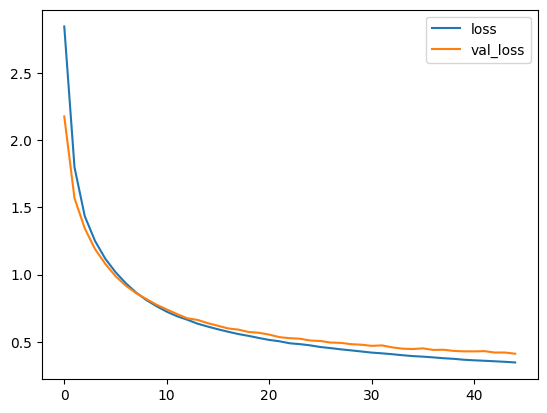

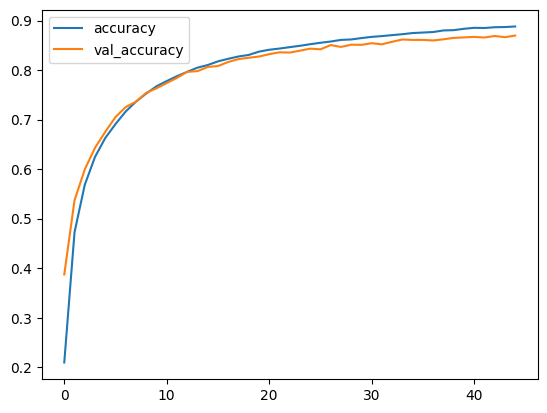

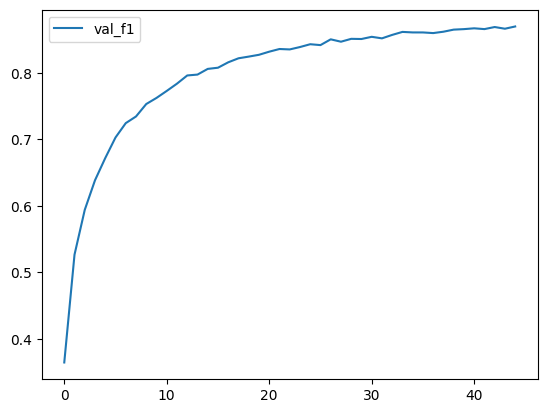

test loss: 0.41006916538553423, test accuracy: 0.8715384615384615, f1: 0.8715735622954379
best test loss: 0.4097643177507093, test accuracy: 0.8700961538461538, test f1: 0.8700091895934587


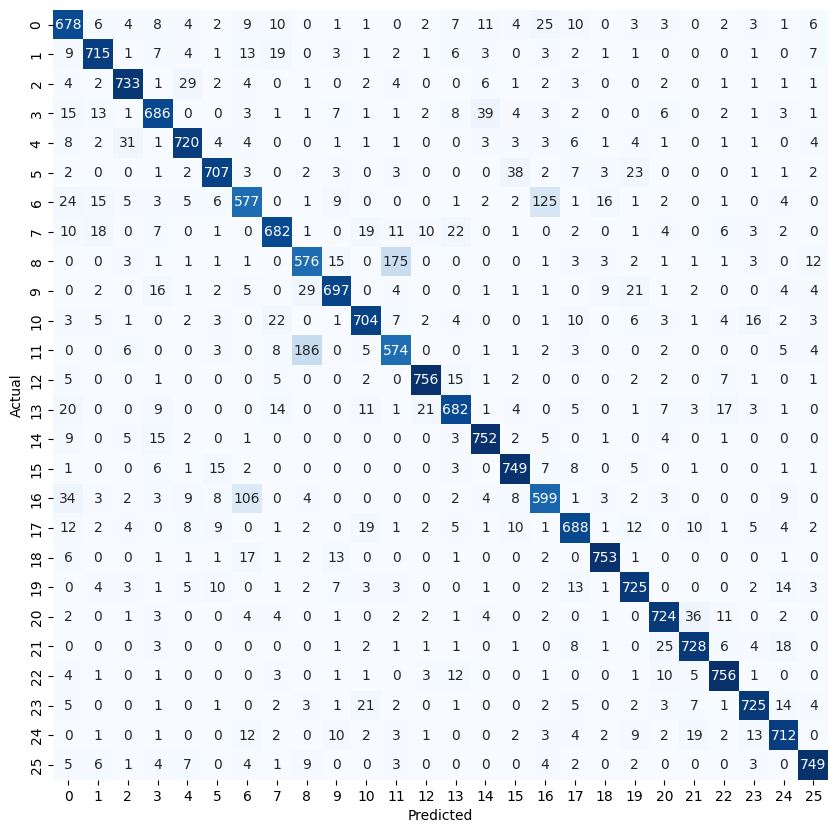

learning rate: 0.0025


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 1/45, loss: 3.1193, accuracy: 0.1280, val_loss: 2.8794, val_accuracy: 0.2260, val_f1: 0.1964


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 2/45, loss: 2.4650, accuracy: 0.3143, val_loss: 2.1133, val_accuracy: 0.3919, val_f1: 0.3802


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 3/45, loss: 1.8922, accuracy: 0.4459, val_loss: 1.7359, val_accuracy: 0.4916, val_f1: 0.4836


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 4/45, loss: 1.6246, accuracy: 0.5193, val_loss: 1.5387, val_accuracy: 0.5427, val_f1: 0.5368


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 5/45, loss: 1.4684, accuracy: 0.5608, val_loss: 1.4220, val_accuracy: 0.5759, val_f1: 0.5714


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 6/45, loss: 1.3571, accuracy: 0.5942, val_loss: 1.3251, val_accuracy: 0.6048, val_f1: 0.6031


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 7/45, loss: 1.2659, accuracy: 0.6207, val_loss: 1.2411, val_accuracy: 0.6303, val_f1: 0.6277


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 8/45, loss: 1.1924, accuracy: 0.6431, val_loss: 1.1694, val_accuracy: 0.6523, val_f1: 0.6492


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 9/45, loss: 1.1258, accuracy: 0.6613, val_loss: 1.1218, val_accuracy: 0.6646, val_f1: 0.6622


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 10/45, loss: 1.0696, accuracy: 0.6780, val_loss: 1.0665, val_accuracy: 0.6803, val_f1: 0.6777


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 11/45, loss: 1.0213, accuracy: 0.6934, val_loss: 1.0172, val_accuracy: 0.6973, val_f1: 0.6948


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 12/45, loss: 0.9744, accuracy: 0.7062, val_loss: 0.9759, val_accuracy: 0.7079, val_f1: 0.7067


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 13/45, loss: 0.9341, accuracy: 0.7188, val_loss: 0.9336, val_accuracy: 0.7214, val_f1: 0.7202


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 14/45, loss: 0.8985, accuracy: 0.7290, val_loss: 0.9095, val_accuracy: 0.7236, val_f1: 0.7222


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 15/45, loss: 0.8657, accuracy: 0.7375, val_loss: 0.8728, val_accuracy: 0.7377, val_f1: 0.7365


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 16/45, loss: 0.8356, accuracy: 0.7469, val_loss: 0.8473, val_accuracy: 0.7447, val_f1: 0.7438


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 17/45, loss: 0.8080, accuracy: 0.7538, val_loss: 0.8241, val_accuracy: 0.7520, val_f1: 0.7506


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 18/45, loss: 0.7836, accuracy: 0.7628, val_loss: 0.7973, val_accuracy: 0.7597, val_f1: 0.7586


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 19/45, loss: 0.7631, accuracy: 0.7687, val_loss: 0.7722, val_accuracy: 0.7676, val_f1: 0.7662


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 20/45, loss: 0.7394, accuracy: 0.7757, val_loss: 0.7577, val_accuracy: 0.7703, val_f1: 0.7693


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 21/45, loss: 0.7227, accuracy: 0.7814, val_loss: 0.7414, val_accuracy: 0.7745, val_f1: 0.7737


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 22/45, loss: 0.7045, accuracy: 0.7856, val_loss: 0.7148, val_accuracy: 0.7839, val_f1: 0.7832


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 23/45, loss: 0.6875, accuracy: 0.7908, val_loss: 0.7057, val_accuracy: 0.7828, val_f1: 0.7819


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 24/45, loss: 0.6709, accuracy: 0.7945, val_loss: 0.6931, val_accuracy: 0.7873, val_f1: 0.7866


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 25/45, loss: 0.6571, accuracy: 0.7999, val_loss: 0.6820, val_accuracy: 0.7897, val_f1: 0.7891


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 26/45, loss: 0.6439, accuracy: 0.8032, val_loss: 0.6733, val_accuracy: 0.7971, val_f1: 0.7962


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 27/45, loss: 0.6286, accuracy: 0.8069, val_loss: 0.6535, val_accuracy: 0.7997, val_f1: 0.7993


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 28/45, loss: 0.6194, accuracy: 0.8103, val_loss: 0.6425, val_accuracy: 0.8017, val_f1: 0.8011


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 29/45, loss: 0.6074, accuracy: 0.8137, val_loss: 0.6318, val_accuracy: 0.8076, val_f1: 0.8070


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 30/45, loss: 0.5969, accuracy: 0.8168, val_loss: 0.6275, val_accuracy: 0.8082, val_f1: 0.8074


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 31/45, loss: 0.5874, accuracy: 0.8185, val_loss: 0.6177, val_accuracy: 0.8097, val_f1: 0.8092


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 32/45, loss: 0.5773, accuracy: 0.8213, val_loss: 0.6112, val_accuracy: 0.8116, val_f1: 0.8111


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 33/45, loss: 0.5705, accuracy: 0.8233, val_loss: 0.5966, val_accuracy: 0.8181, val_f1: 0.8175


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 34/45, loss: 0.5608, accuracy: 0.8257, val_loss: 0.5868, val_accuracy: 0.8175, val_f1: 0.8170


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 35/45, loss: 0.5513, accuracy: 0.8296, val_loss: 0.5797, val_accuracy: 0.8258, val_f1: 0.8254


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 36/45, loss: 0.5427, accuracy: 0.8323, val_loss: 0.5761, val_accuracy: 0.8236, val_f1: 0.8233


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 37/45, loss: 0.5364, accuracy: 0.8343, val_loss: 0.5621, val_accuracy: 0.8285, val_f1: 0.8280


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 38/45, loss: 0.5301, accuracy: 0.8349, val_loss: 0.5653, val_accuracy: 0.8298, val_f1: 0.8295


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 39/45, loss: 0.5226, accuracy: 0.8385, val_loss: 0.5576, val_accuracy: 0.8282, val_f1: 0.8278


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 40/45, loss: 0.5153, accuracy: 0.8399, val_loss: 0.5517, val_accuracy: 0.8284, val_f1: 0.8282


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 41/45, loss: 0.5059, accuracy: 0.8426, val_loss: 0.5423, val_accuracy: 0.8334, val_f1: 0.8331


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 42/45, loss: 0.5023, accuracy: 0.8434, val_loss: 0.5440, val_accuracy: 0.8334, val_f1: 0.8331


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 43/45, loss: 0.4962, accuracy: 0.8441, val_loss: 0.5372, val_accuracy: 0.8371, val_f1: 0.8368


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 44/45, loss: 0.4890, accuracy: 0.8468, val_loss: 0.5322, val_accuracy: 0.8366, val_f1: 0.8363


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 45/45, loss: 0.4853, accuracy: 0.8484, val_loss: 0.5238, val_accuracy: 0.8362, val_f1: 0.8360


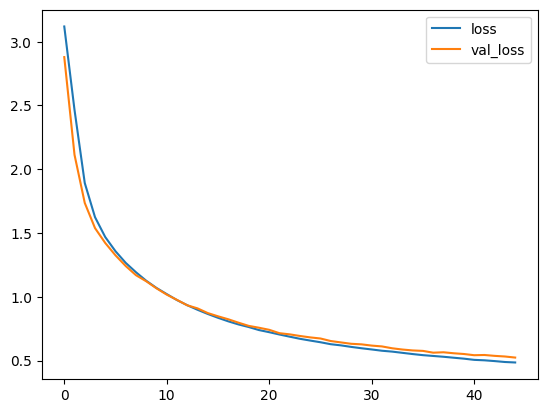

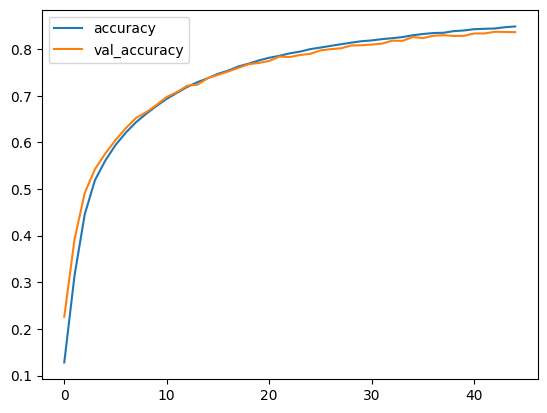

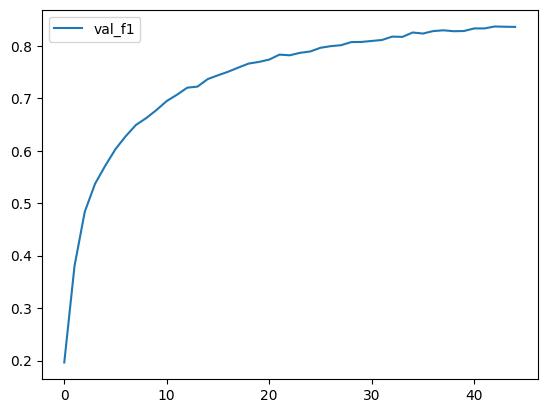

test loss: 0.5224507659877602, test accuracy: 0.8392307692307692, f1: 0.8389833256435721
best test loss: 0.5253473931890145, test accuracy: 0.8367307692307693, test f1: 0.8364396283042784


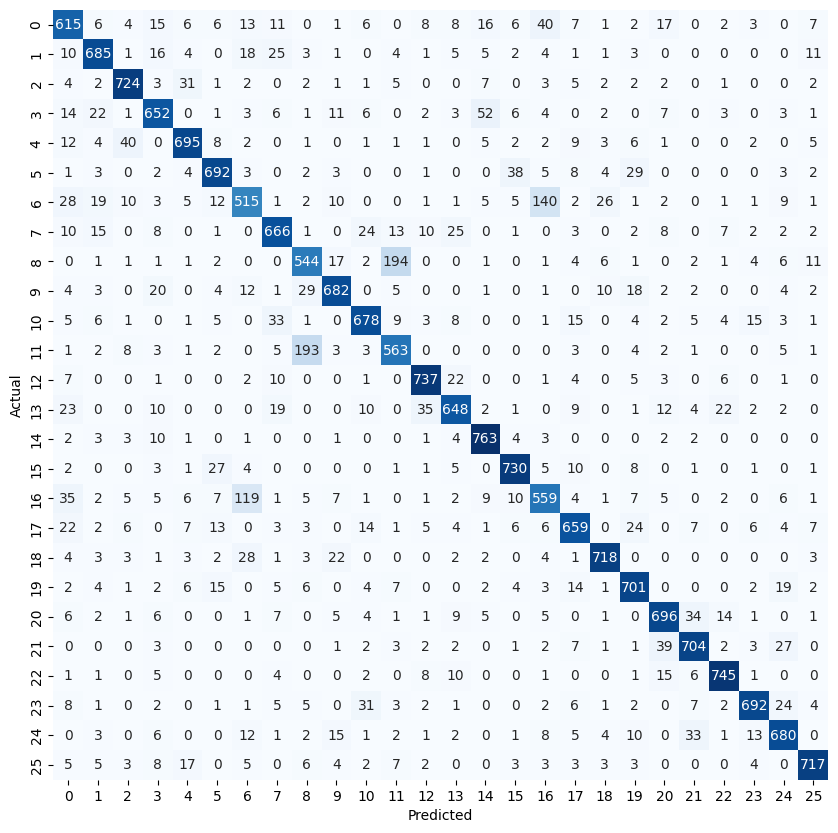

learning rate: 0.001


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 1/45, loss: 3.2293, accuracy: 0.0693, val_loss: 3.1863, val_accuracy: 0.1046, val_f1: 0.0726


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 2/45, loss: 3.1205, accuracy: 0.1384, val_loss: 3.0411, val_accuracy: 0.1765, val_f1: 0.1369


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 3/45, loss: 2.9156, accuracy: 0.2142, val_loss: 2.7787, val_accuracy: 0.2496, val_f1: 0.2159


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 4/45, loss: 2.6069, accuracy: 0.2980, val_loss: 2.4497, val_accuracy: 0.3321, val_f1: 0.3075


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 5/45, loss: 2.2838, accuracy: 0.3675, val_loss: 2.1542, val_accuracy: 0.3965, val_f1: 0.3758


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 6/45, loss: 2.0268, accuracy: 0.4185, val_loss: 1.9406, val_accuracy: 0.4383, val_f1: 0.4232


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 7/45, loss: 1.8477, accuracy: 0.4581, val_loss: 1.7779, val_accuracy: 0.4780, val_f1: 0.4669


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 8/45, loss: 1.7166, accuracy: 0.4939, val_loss: 1.6802, val_accuracy: 0.5034, val_f1: 0.4938


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 9/45, loss: 1.6200, accuracy: 0.5164, val_loss: 1.5909, val_accuracy: 0.5302, val_f1: 0.5229


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 10/45, loss: 1.5480, accuracy: 0.5388, val_loss: 1.5241, val_accuracy: 0.5454, val_f1: 0.5383


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 11/45, loss: 1.4842, accuracy: 0.5556, val_loss: 1.4659, val_accuracy: 0.5632, val_f1: 0.5585


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 12/45, loss: 1.4329, accuracy: 0.5714, val_loss: 1.4289, val_accuracy: 0.5729, val_f1: 0.5678


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 13/45, loss: 1.3910, accuracy: 0.5825, val_loss: 1.3816, val_accuracy: 0.5859, val_f1: 0.5814


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 14/45, loss: 1.3457, accuracy: 0.5970, val_loss: 1.3435, val_accuracy: 0.5984, val_f1: 0.5937


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 15/45, loss: 1.3115, accuracy: 0.6077, val_loss: 1.3121, val_accuracy: 0.6083, val_f1: 0.6044


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 16/45, loss: 1.2797, accuracy: 0.6166, val_loss: 1.2771, val_accuracy: 0.6196, val_f1: 0.6158


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 17/45, loss: 1.2457, accuracy: 0.6276, val_loss: 1.2496, val_accuracy: 0.6291, val_f1: 0.6254


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 18/45, loss: 1.2203, accuracy: 0.6336, val_loss: 1.2220, val_accuracy: 0.6345, val_f1: 0.6313


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 19/45, loss: 1.1898, accuracy: 0.6432, val_loss: 1.1948, val_accuracy: 0.6410, val_f1: 0.6383


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 20/45, loss: 1.1636, accuracy: 0.6519, val_loss: 1.1710, val_accuracy: 0.6514, val_f1: 0.6490


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 21/45, loss: 1.1395, accuracy: 0.6597, val_loss: 1.1461, val_accuracy: 0.6590, val_f1: 0.6564


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 22/45, loss: 1.1200, accuracy: 0.6636, val_loss: 1.1198, val_accuracy: 0.6637, val_f1: 0.6618


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 23/45, loss: 1.0965, accuracy: 0.6706, val_loss: 1.1080, val_accuracy: 0.6705, val_f1: 0.6680


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 24/45, loss: 1.0722, accuracy: 0.6784, val_loss: 1.0817, val_accuracy: 0.6754, val_f1: 0.6730


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 25/45, loss: 1.0532, accuracy: 0.6834, val_loss: 1.0710, val_accuracy: 0.6792, val_f1: 0.6771


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 26/45, loss: 1.0354, accuracy: 0.6890, val_loss: 1.0446, val_accuracy: 0.6849, val_f1: 0.6832


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 27/45, loss: 1.0171, accuracy: 0.6923, val_loss: 1.0308, val_accuracy: 0.6942, val_f1: 0.6922


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 28/45, loss: 0.9985, accuracy: 0.6999, val_loss: 1.0127, val_accuracy: 0.6986, val_f1: 0.6967


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 29/45, loss: 0.9826, accuracy: 0.7054, val_loss: 0.9891, val_accuracy: 0.7030, val_f1: 0.7008


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 30/45, loss: 0.9648, accuracy: 0.7095, val_loss: 0.9776, val_accuracy: 0.7059, val_f1: 0.7042


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 31/45, loss: 0.9474, accuracy: 0.7146, val_loss: 0.9649, val_accuracy: 0.7130, val_f1: 0.7115


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 32/45, loss: 0.9341, accuracy: 0.7184, val_loss: 0.9546, val_accuracy: 0.7152, val_f1: 0.7137


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 33/45, loss: 0.9207, accuracy: 0.7227, val_loss: 0.9362, val_accuracy: 0.7188, val_f1: 0.7173


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 34/45, loss: 0.9063, accuracy: 0.7256, val_loss: 0.9246, val_accuracy: 0.7210, val_f1: 0.7200


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 35/45, loss: 0.8897, accuracy: 0.7330, val_loss: 0.9088, val_accuracy: 0.7287, val_f1: 0.7271


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 36/45, loss: 0.8840, accuracy: 0.7335, val_loss: 0.9004, val_accuracy: 0.7293, val_f1: 0.7277


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 37/45, loss: 0.8682, accuracy: 0.7364, val_loss: 0.8851, val_accuracy: 0.7308, val_f1: 0.7294


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 38/45, loss: 0.8554, accuracy: 0.7417, val_loss: 0.8767, val_accuracy: 0.7378, val_f1: 0.7366


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 39/45, loss: 0.8451, accuracy: 0.7449, val_loss: 0.8620, val_accuracy: 0.7413, val_f1: 0.7402


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 40/45, loss: 0.8331, accuracy: 0.7476, val_loss: 0.8563, val_accuracy: 0.7433, val_f1: 0.7423


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 41/45, loss: 0.8225, accuracy: 0.7505, val_loss: 0.8489, val_accuracy: 0.7443, val_f1: 0.7429


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 42/45, loss: 0.8109, accuracy: 0.7545, val_loss: 0.8396, val_accuracy: 0.7442, val_f1: 0.7432


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 43/45, loss: 0.8005, accuracy: 0.7569, val_loss: 0.8254, val_accuracy: 0.7511, val_f1: 0.7497


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 44/45, loss: 0.7935, accuracy: 0.7588, val_loss: 0.8208, val_accuracy: 0.7525, val_f1: 0.7512


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 45/45, loss: 0.7858, accuracy: 0.7619, val_loss: 0.8164, val_accuracy: 0.7535, val_f1: 0.7523


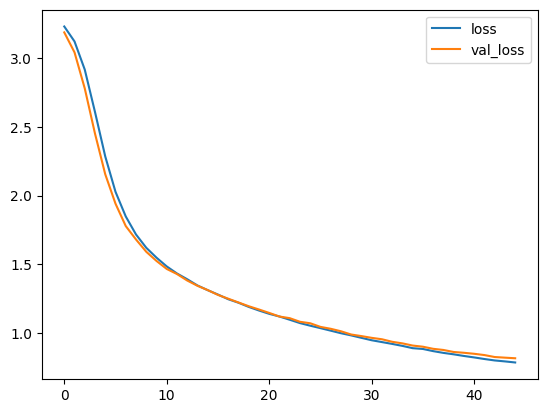

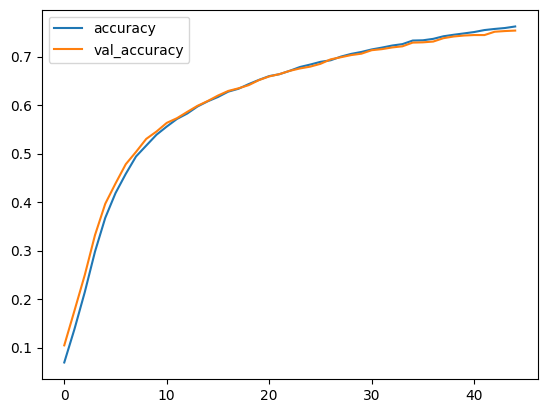

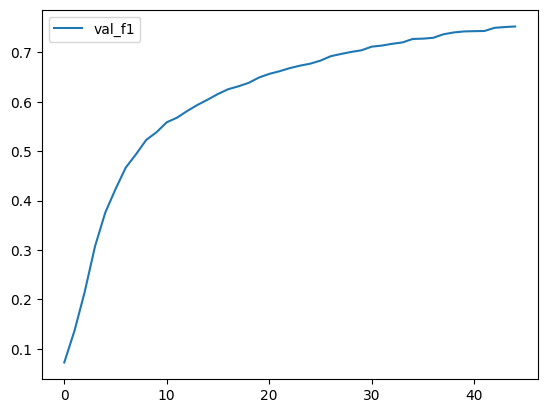

test loss: 0.7953561874624901, test accuracy: 0.7594711538461538, f1: 0.7585304346342525
best test loss: 0.7972912213016224, test accuracy: 0.7588461538461538, test f1: 0.7580655424916038


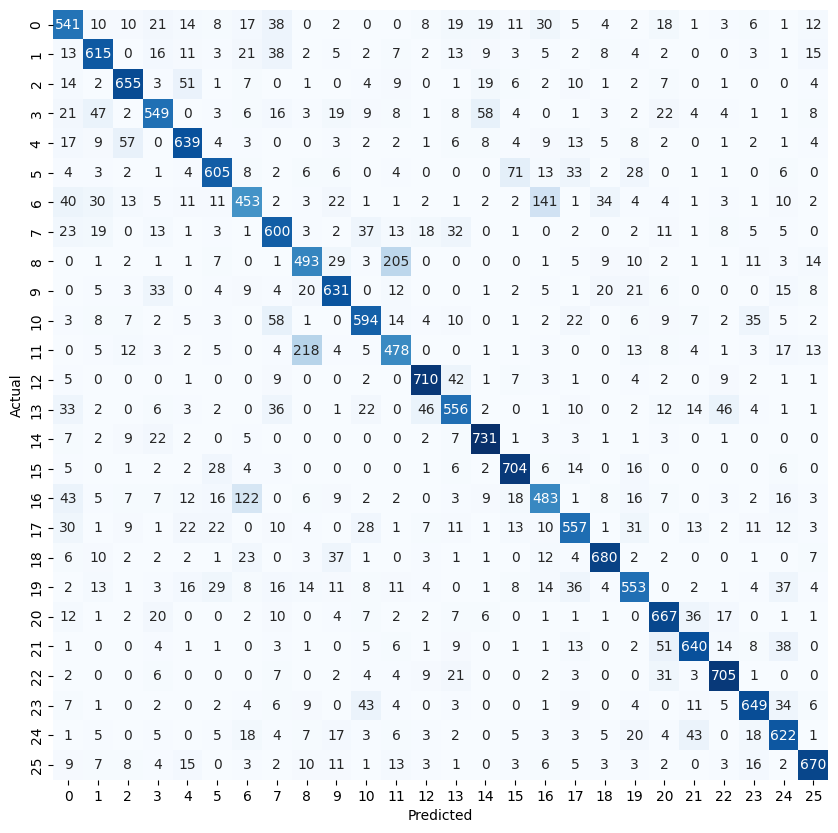

learning rate: 0.00075


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 1/45, loss: 3.2420, accuracy: 0.0496, val_loss: 3.2074, val_accuracy: 0.0767, val_f1: 0.0572


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 2/45, loss: 3.1658, accuracy: 0.1056, val_loss: 3.1121, val_accuracy: 0.1403, val_f1: 0.1017


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 3/45, loss: 3.0404, accuracy: 0.1660, val_loss: 2.9560, val_accuracy: 0.1921, val_f1: 0.1468


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 4/45, loss: 2.8403, accuracy: 0.2245, val_loss: 2.7248, val_accuracy: 0.2539, val_f1: 0.2169


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 5/45, loss: 2.5916, accuracy: 0.2864, val_loss: 2.4659, val_accuracy: 0.3189, val_f1: 0.2913


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 6/45, loss: 2.3483, accuracy: 0.3450, val_loss: 2.2493, val_accuracy: 0.3649, val_f1: 0.3443


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 7/45, loss: 2.1426, accuracy: 0.3941, val_loss: 2.0598, val_accuracy: 0.4122, val_f1: 0.3948


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 8/45, loss: 1.9779, accuracy: 0.4322, val_loss: 1.9167, val_accuracy: 0.4500, val_f1: 0.4377


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 9/45, loss: 1.8459, accuracy: 0.4637, val_loss: 1.8078, val_accuracy: 0.4738, val_f1: 0.4652


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 10/45, loss: 1.7467, accuracy: 0.4877, val_loss: 1.7144, val_accuracy: 0.5010, val_f1: 0.4935


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 11/45, loss: 1.6686, accuracy: 0.5073, val_loss: 1.6456, val_accuracy: 0.5156, val_f1: 0.5087


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 12/45, loss: 1.6034, accuracy: 0.5240, val_loss: 1.5848, val_accuracy: 0.5303, val_f1: 0.5240


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 13/45, loss: 1.5490, accuracy: 0.5394, val_loss: 1.5309, val_accuracy: 0.5436, val_f1: 0.5386


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 14/45, loss: 1.5010, accuracy: 0.5512, val_loss: 1.5090, val_accuracy: 0.5535, val_f1: 0.5477


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 15/45, loss: 1.4628, accuracy: 0.5623, val_loss: 1.4532, val_accuracy: 0.5653, val_f1: 0.5604


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 16/45, loss: 1.4229, accuracy: 0.5744, val_loss: 1.4205, val_accuracy: 0.5807, val_f1: 0.5758


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 17/45, loss: 1.3910, accuracy: 0.5841, val_loss: 1.3896, val_accuracy: 0.5854, val_f1: 0.5818


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 18/45, loss: 1.3580, accuracy: 0.5927, val_loss: 1.3590, val_accuracy: 0.5973, val_f1: 0.5940


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 19/45, loss: 1.3280, accuracy: 0.6023, val_loss: 1.3302, val_accuracy: 0.6014, val_f1: 0.5980


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 20/45, loss: 1.3038, accuracy: 0.6100, val_loss: 1.3070, val_accuracy: 0.6119, val_f1: 0.6086


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 21/45, loss: 1.2815, accuracy: 0.6151, val_loss: 1.2844, val_accuracy: 0.6180, val_f1: 0.6153


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 22/45, loss: 1.2529, accuracy: 0.6234, val_loss: 1.2536, val_accuracy: 0.6238, val_f1: 0.6214


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 23/45, loss: 1.2294, accuracy: 0.6311, val_loss: 1.2375, val_accuracy: 0.6288, val_f1: 0.6260


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 24/45, loss: 1.2098, accuracy: 0.6363, val_loss: 1.2147, val_accuracy: 0.6342, val_f1: 0.6316


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 25/45, loss: 1.1903, accuracy: 0.6413, val_loss: 1.1928, val_accuracy: 0.6453, val_f1: 0.6427


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 26/45, loss: 1.1692, accuracy: 0.6484, val_loss: 1.1710, val_accuracy: 0.6508, val_f1: 0.6477


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 27/45, loss: 1.1530, accuracy: 0.6522, val_loss: 1.1592, val_accuracy: 0.6535, val_f1: 0.6508


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 28/45, loss: 1.1310, accuracy: 0.6581, val_loss: 1.1384, val_accuracy: 0.6599, val_f1: 0.6577


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 29/45, loss: 1.1132, accuracy: 0.6627, val_loss: 1.1213, val_accuracy: 0.6634, val_f1: 0.6613


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 30/45, loss: 1.0981, accuracy: 0.6687, val_loss: 1.0999, val_accuracy: 0.6696, val_f1: 0.6671


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 31/45, loss: 1.0797, accuracy: 0.6734, val_loss: 1.0949, val_accuracy: 0.6704, val_f1: 0.6679


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 32/45, loss: 1.0678, accuracy: 0.6775, val_loss: 1.0769, val_accuracy: 0.6757, val_f1: 0.6741


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 33/45, loss: 1.0462, accuracy: 0.6822, val_loss: 1.0578, val_accuracy: 0.6780, val_f1: 0.6760


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 34/45, loss: 1.0321, accuracy: 0.6877, val_loss: 1.0461, val_accuracy: 0.6858, val_f1: 0.6840


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 35/45, loss: 1.0201, accuracy: 0.6910, val_loss: 1.0373, val_accuracy: 0.6864, val_f1: 0.6843


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 36/45, loss: 1.0068, accuracy: 0.6951, val_loss: 1.0179, val_accuracy: 0.6934, val_f1: 0.6915


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 37/45, loss: 0.9925, accuracy: 0.6985, val_loss: 1.0124, val_accuracy: 0.6929, val_f1: 0.6911


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 38/45, loss: 0.9768, accuracy: 0.7048, val_loss: 0.9972, val_accuracy: 0.7021, val_f1: 0.7002


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 39/45, loss: 0.9665, accuracy: 0.7069, val_loss: 0.9819, val_accuracy: 0.7045, val_f1: 0.7030


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 40/45, loss: 0.9551, accuracy: 0.7108, val_loss: 0.9731, val_accuracy: 0.7047, val_f1: 0.7027


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 41/45, loss: 0.9417, accuracy: 0.7147, val_loss: 0.9643, val_accuracy: 0.7102, val_f1: 0.7087


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 42/45, loss: 0.9312, accuracy: 0.7167, val_loss: 0.9501, val_accuracy: 0.7166, val_f1: 0.7151


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 43/45, loss: 0.9209, accuracy: 0.7205, val_loss: 0.9348, val_accuracy: 0.7168, val_f1: 0.7150


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 44/45, loss: 0.9082, accuracy: 0.7235, val_loss: 0.9241, val_accuracy: 0.7222, val_f1: 0.7203


Training: 100%|██████████ [ time left: 00:00 ]


epoch: 45/45, loss: 0.8973, accuracy: 0.7276, val_loss: 0.9133, val_accuracy: 0.7207, val_f1: 0.7193


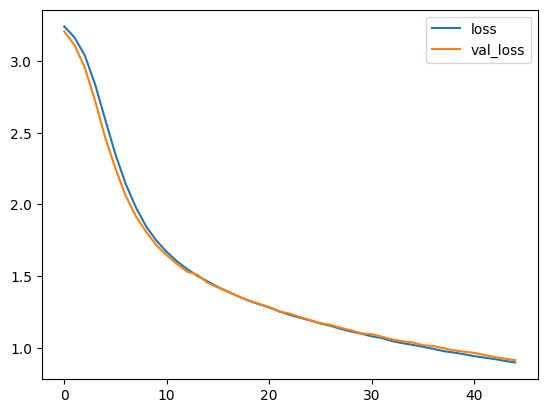

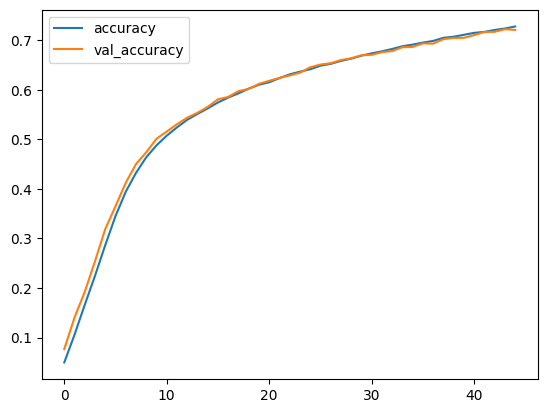

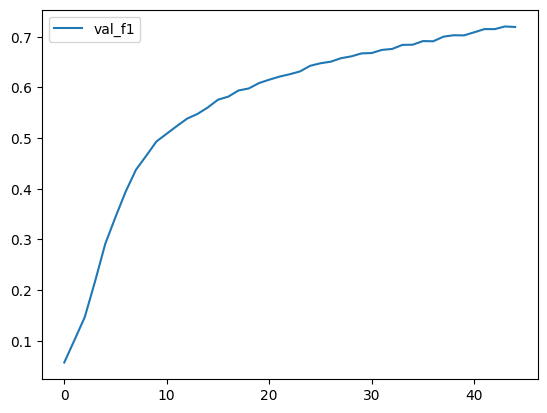

test loss: 0.900898062850906, test accuracy: 0.7256730769230769, f1: 0.7242188807303847
best test loss: 0.9039440307705151, test accuracy: 0.7240865384615385, test f1: 0.722369545951595


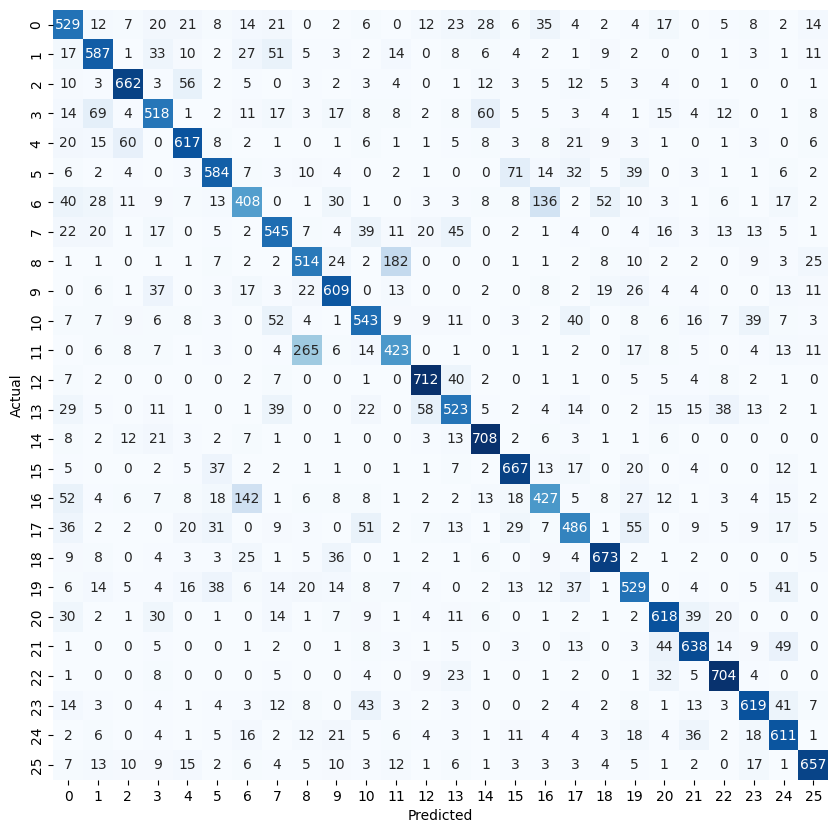

In [29]:
# learning rate
lr = [0.005, 0.0025, 0.001, 0.00075]
for lrate in lr:
    model = FNN(
        loss=CategoricalCrossEntropyLoss(),
        optimizer=SGD(learning_rate=lrate),
        learning_rate=lrate,
        layers=[
            Flatten(),
            DenseLayer(input_size, 1024, ReLU()),
            DropoutLayer(dropout_rate=0.3),
            DenseLayer(1024, 256, ReLU()),
            DropoutLayer(dropout_rate=0.2),
            DenseLayer(256, 128, ReLU()),
            DropoutLayer(dropout_rate=0.1),
            DenseLayer(128, output_size, Softmax()),
        ]
    )



    # take only part after decimal point
    lrate_str = str(lrate).split(".")[1]

    # train
    model.fit(
        X=train_ds,
        y=train_labels,
        X_val=val_ds,
        y_val=val_labels,
        epochs=45,
        batch_size=64,
        best_name=f"best{m}_{lrate_str}.pkl"
    )

    # plot
    model.plot()

    # test model
    X_test = test_ds.data
    y_test = test_ds.targets
    test_loss, test_accuracy, f1 = model.evaluate(X_test, y_test)

    print(f"test loss: {test_loss}, test accuracy: {test_accuracy}, f1: {f1}")


    # test of best model
    test_loss, test_accuracy, f1 = model.best_model_evaluate(X_test, y_test)

    print(f"best test loss: {test_loss}, test accuracy: {test_accuracy}, test f1: {f1}")

    # plot confusion matrix
    model.plot_confusion_matrix(X_test, y_test)

    # save model
    model.save(f"last{m}_{lrate_str}.pkl")